In [2]:
import pandas as pd
import numpy as np

dc_listings = pd.read_csv('http://data.insideairbnb.com/united-states/dc/washington-dc/2015-10-03/data/listings.csv.gz')

In [3]:
dc_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7087327,https://www.airbnb.com/rooms/7087327,20151002231825,2015-10-03,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,Professional pictures coming soon! Welcome to ...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,18,NaN
1,975833,https://www.airbnb.com/rooms/975833,20151002231825,2015-10-03,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,Beautifully renovated Capitol Hill townhouse. ...,none,NaN,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,2.11
2,8249488,https://www.airbnb.com/rooms/8249488,20151002231825,2015-10-03,Spacious/private room for single,This is an ideal room for a single traveler th...,NaN,This is an ideal room for a single traveler th...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,1.00
3,8409022,https://www.airbnb.com/rooms/8409022,20151002231825,2015-10-03,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,Prime location right on the Potomac River in W...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
4,8411173,https://www.airbnb.com/rooms/8411173,20151002231825,2015-10-03,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",This is a 750 sq ft 1 bedroom 1 bathroom. Whi...,"Hi travellers! I live in this peaceful spot, b...",none,Silver Spring is booming. You can walk to a n...,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [4]:
# Cleaning & Permutating data (Randomize the ordering of the dataset within the same distance, that way we won't be biasing the result to the ordering of the dataset.)

stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

Euclidean distance calculates the distance between 2 observations. By ranking the distance by ascending orders, we can find the similarity.

Below is a simple example for an univariate case.

In [8]:
new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))
# dc_listings['distance'].value_counts()

dc_listings = dc_listings.sort_values('distance')
mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)

156.6


In [6]:
# Create a function

import pandas as pd
import numpy as np

dc_listings = pd.read_csv('http://data.insideairbnb.com/united-states/dc/washington-dc/2015-10-03/data/listings.csv.gz')

stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

In [9]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
rmse = mse ** (1/2)
print("One feature model: ", mse, rmse)

One feature model:  18646.525370569325 136.55228072269364


### Multivariate K-nearest Neighbors

In [14]:
np.random.seed(1)

drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']

dc_listings = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/140/dc_airbnb.csv?versionId=Q6mHGVbfiZHJTc5u3ggFujeFbUAtUJ2q')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

dc_listings = dc_listings.drop(drop_columns, axis=1)
print(dc_listings.isnull().sum())

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [15]:
dc_listings = dc_listings.drop(['cleaning_fee', 'security_deposit'], axis=1)
# remove the rows containing missing values
dc_listings = dc_listings.dropna(axis=0)
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


To avoid having an outsized effect on the distance, normalize all of the columns to have a mean of 0 and a stdev of 1.

In [19]:
normalized_listings = (dc_listings - dc_listings.mean())/(dc_listings.std())

normalized_listings['price'] = dc_listings['price']
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


#### Train a model using 4 features

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# select the relevant attributes
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df['price'], four_predictions)
four_rmse = four_mse ** (1/2)
print(four_mse)
print(four_rmse)

15851.681638225256
125.90346158158344


#### Train a model using all features

In [21]:
# increase the number of attributes by using all columns

knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

features = train_df.columns.tolist()
features.remove('price')

knn.fit(train_df[features], train_df['price'])
all_features_predictions = knn.predict(test_df[features])
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)
all_features_rmse = all_features_mse ** (1/2)
print(all_features_mse)
print(all_features_rmse)

13653.218202502845
116.84698627907716


MSE and RMSE decreased as we increase the number of features and selected relevant features

### Hyperparameter optimization

Process of finding the optimal hyperparameter value

Also known as grid search: evaluating the model performance at different k values and selecting the k value that resulted in the lowest error

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_df = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/141/dc_airbnb_test.csv?versionId=RF0hZ3fqriNLUQ7AU5KuZQqa7omCDy1m')
test_df = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/141/dc_airbnb_train.csv?versionId=3bxlkslBBNbiVI.Tni7h7fsIdWfGpzf.')

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

hyper_params = [x for x in range(1, 21)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

As k increases, the error rate decreases until a certain point, but then rebounds and increases again.

##### Optimal k value is 6, since it resulted in the lowest MSE value

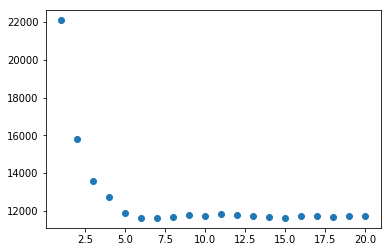

In [33]:
plt.scatter(hyper_params, mse_values)
plt.show()

##### Perform the grid search using dictionary

In [34]:
mse_values[:5]

[22089.760386819486,
 15816.182754297994,
 13556.333293537089,
 12744.842809813754,
 11874.90070200573]

In [32]:
# Finding the k value associated with the lowest MSE 

lowest_mse = mse_values[0]
lowest_k = 1

for k,mse in enumerate(mse_values):
    if mse < lowest_mse:
        lowest_mse = mse
        lowest_k = k + 1

hyp_mse = dict()
hyp_mse[lowest_k] = lowest_mse

hyp_mse

{6: 11626.922248089779}

When in doubt, create another model by performing the same procedure with different sets of features

### Cross Validation

#####  Holdout Validation

In [36]:
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

model = KNeighborsRegressor()

# Train first half and Test second half
model.fit(train_one[["accommodates"]], train_one["price"])
test_one["predicted_price"] = model.predict(test_one[["accommodates"]])
iteration_one_rmse = mean_squared_error(test_one["price"], test_one["predicted_price"])**(1/2)

# Train second half and Test first half
model.fit(train_two[["accommodates"]], train_two["price"])
test_two["predicted_price"] = model.predict(test_two[["accommodates"]])
iteration_two_rmse = mean_squared_error(test_two["price"], test_two["predicted_price"])**(1/2)

avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])

print(iteration_one_rmse, iteration_two_rmse, avg_rmse)

117.72468326695143 140.8295579907386 129.277120628845


### K-fold cross-validation

In [38]:
# Assign fold number for a different range of rows 
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

print(dc_listings['fold'].value_counts())
print("\n Num of missing values: ", dc_listings['fold'].isnull().sum())

2.0    745
1.0    745
4.0    744
3.0    744
5.0    693
Name: fold, dtype: int64

 Num of missing values:  0


In [39]:
fold_ids = [1,2,3,4,5]

def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        
        model = KNeighborsRegressor()
        train = df[df["fold"] != fold]
        test = df[df["fold"] == fold].copy()
        model.fit(train[["accommodates"]], train["price"])

        labels = model.predict(test[["accommodates"]])
        test["predicted_price"] = labels
        mse = mean_squared_error(test["price"], test["predicted_price"])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return(fold_rmses)

rmses = train_and_validate(dc_listings, fold_ids)
print(rmses)

avg_rmse = np.mean(rmses)
print(avg_rmse)

[144.84681841645374, 125.32842781584691, 125.30059942016942, 107.63124496387245, 115.58657930753603]
123.73873398477572


## Using Scikit-learn for K-fold cross validation

In [40]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(5, shuffle=True, random_state=1)
model = KNeighborsRegressor()
mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)

print(rmses)
print(avg_rmse)

[143.77182943 123.88674445 142.14925954 106.42425867 127.86157173]
128.81873276584412


### Bias and Variance

Standard deviation of the RMSE values can be a proxy for a model's variance.
Average RMSE is a proxy for a model's bias.

In [43]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
mean_rmse = []

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    mean_rmse.append(avg_rmse)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  134.86707913681195 std RMSE:  14.842720846427673
5 folds:  avg RMSE:  128.81873276584412 std RMSE:  13.62388476280421
7 folds:  avg RMSE:  127.59502082826965 std RMSE:  14.294535047083892
9 folds:  avg RMSE:  124.63739434767734 std RMSE:  24.359423338404667
10 folds:  avg RMSE:  124.3671493246145 std RMSE:  21.311992109181915
11 folds:  avg RMSE:  133.12034571517472 std RMSE:  18.88904830648317
13 folds:  avg RMSE:  126.13683643774327 std RMSE:  29.433268675802164
15 folds:  avg RMSE:  125.90598360414621 std RMSE:  22.99458244920716
17 folds:  avg RMSE:  127.10877356321616 std RMSE:  32.073112883950195
19 folds:  avg RMSE:  128.09995447601975 std RMSE:  30.57869743972596
21 folds:  avg RMSE:  126.01273107102536 std RMSE:  31.625311714295744
23 folds:  avg RMSE:  124.38052686458947 std RMSE:  34.43775479217727


Low RMSE (= Low bias but high variance) does not mean the model is accurate due to the high stdev.

#### Bias-variance tradeoff

Bias: error that results in bad assumptions about the learning algorithm. For example, univariate regression model will result in high bias/error

Variance: error that occurs because of the variability of a model's predicted values.  For example, multivariate regression model with 1000 features is complicated to train. There will be a low bias/error, but high variance. In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.


